Region: Arab States
Countries: Algeria

Region: South/Latin America
Countries: Argentina, Brazil, Chile, Colombia, Mexico, Venezuela

Region: Asia & Pacific
Countries: Australia, China, India, Indonesia, Japan, Kazakhstan, Malaysia, New Zealand, South Korea, Taiwan, Thailand, Uzbekistan

Region: Europe
Countries: Belgium, Czechia, France, Germany, Italy, Netherlands, Norway, Poland, Portugal, Romania, Russia, Spain, Sweden, Turkey, Ukraine, United Kingdom

Region: North America
Countries: Canada, United States

Region: Middle east
Countries: Egypt, Iran, Kuwait, Saudi Arabia, United Arab Emirates

Region: Africa
Countries: Nigeria, South Africa



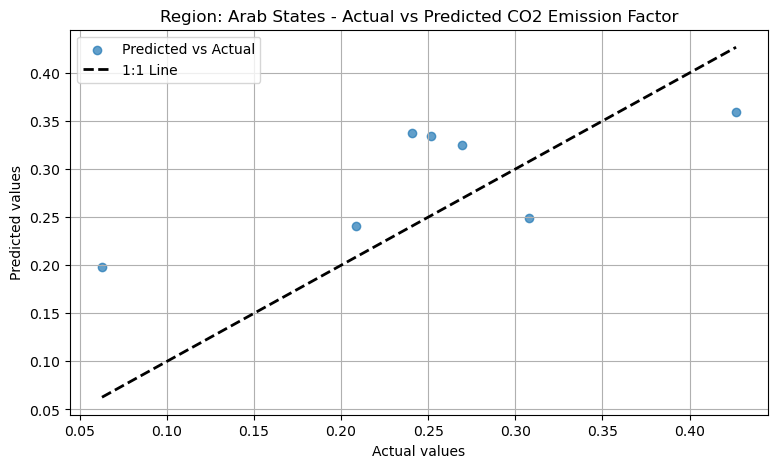

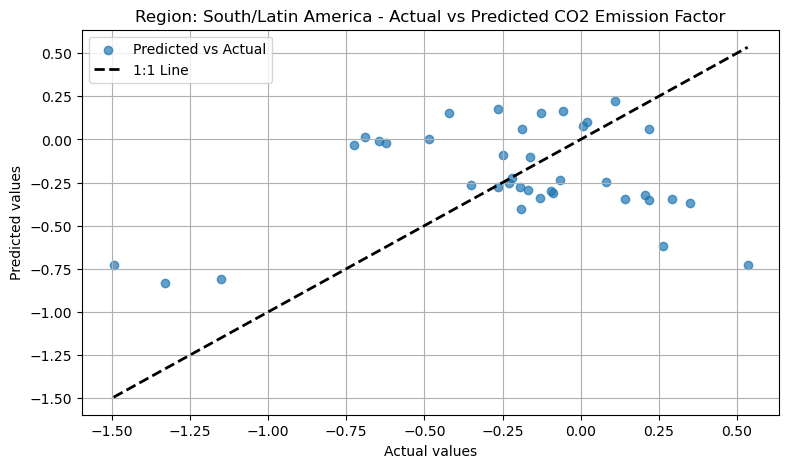

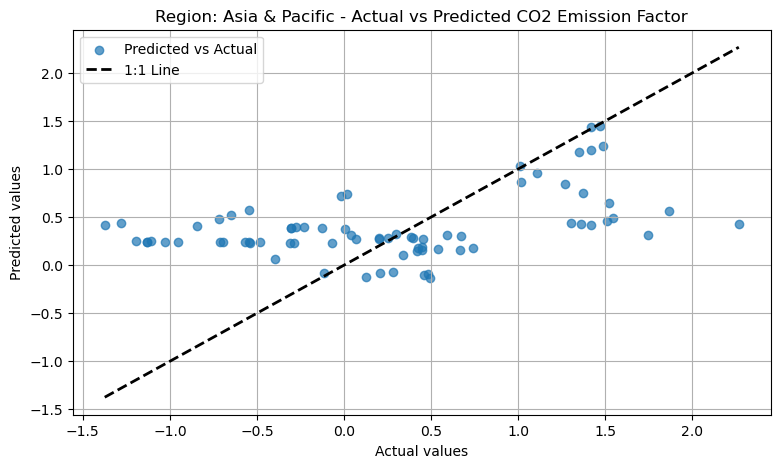

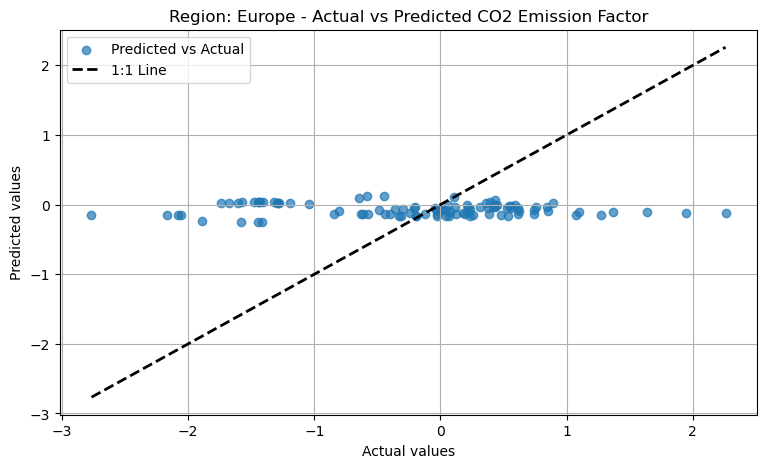

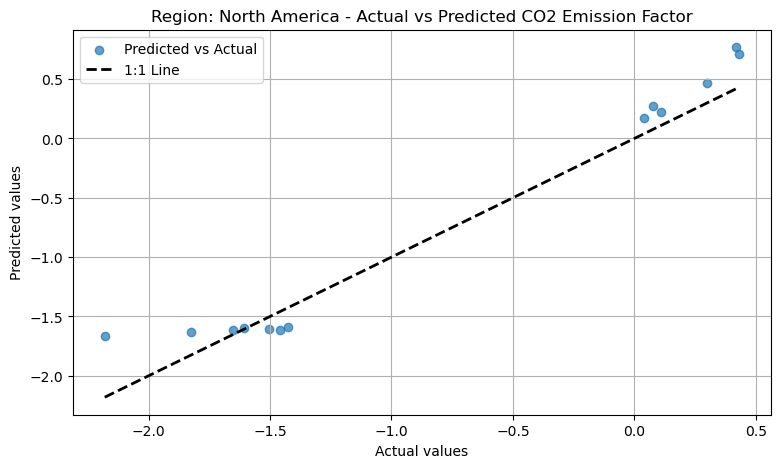

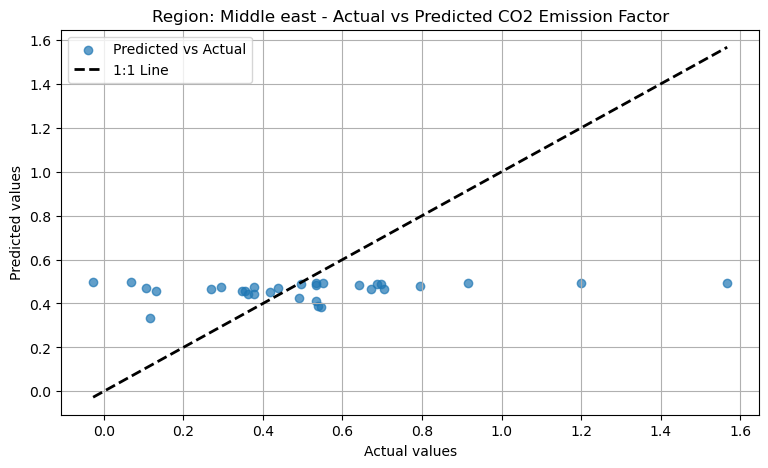

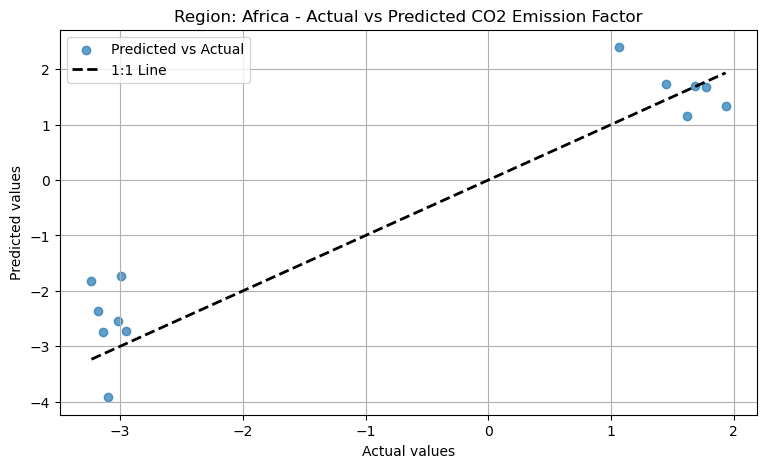

In [23]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('all_scaled.csv')

#  Select required columns
df = df[['country', 'Year', 'Region', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Average CO2 emission factor (tCO2/toe)']]

#  Remove rows with missing values
df = df.dropna()

#  Regional Country Classification Output
regions = df['Region'].unique()
for region in regions:
    countries_in_region = df[df['Region'] == region]['country'].unique()
    print(f"Region: {region}")
    print(f"Countries: {', '.join(countries_in_region)}\n")

#  Multiple regression and visualization by region
results = {}
for region in regions:
    df_region = df[df['Region'] == region]
    
    #  Set independent variable (X) and dependent variable (y)
    X = df_region[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)']]
    y = df_region['Average CO2 emission factor (tCO2/toe)']
    
    #  Separation into training data and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #  Add a constant term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Regression Model Fitting
    model = sm.OLS(y_train, X_train).fit()
    
    # Performing predictions on test data
    y_pred = model.predict(X_test)
    
    # Model Summary and Performance Assessment
    mse = mean_squared_error(y_test, y_pred)
    
    # Save Results
    results[region] = {'model': model, 'mse': mse, 'y_test': y_test, 'y_pred': y_pred}
    
    # Visualization
    plt.figure(figsize=(9, 5))
    plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='1:1 Line')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(f'Region: {region} - Actual vs Predicted CO2 Emission Factor')
    plt.legend()
    plt.grid(True)
    plt.show()


In [24]:
import pandas as pd
import statsmodels.api as sm

# Load Data
df = pd.read_csv('all_scaled.csv')

# Select only the columns required (country, year, total energy production, total energy consumption, CO2 emissions)
df = df[['country', 'Year', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Average CO2 emission factor (tCO2/toe)']]

# Remove rows with missing values
df = df.dropna()

# Set independent variable (X) and dependent variable (y)
X = df[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)']]
y = df['Average CO2 emission factor (tCO2/toe)']

# Add a constant term
X = sm.add_constant(X)

# Regression Model Fitting
model = sm.OLS(y, X).fit()

# Model Summary Output
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Average CO2 emission factor (tCO2/toe)   R-squared:                       0.021
Model:                                                OLS   Adj. R-squared:                  0.020
Method:                                     Least Squares   F-statistic:                     14.77
Date:                                    Tue, 28 May 2024   Prob (F-statistic):           4.52e-07
Time:                                            01:13:04   Log-Likelihood:                -1920.8
No. Observations:                                    1364   AIC:                             3848.
Df Residuals:                                        1361   BIC:                             3863.
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  Load Data
df = pd.read_csv('all_scaled.csv')

# Select required columns
df = df[['country', 'Year', 'Region', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Average CO2 emission factor (tCO2/toe)']]

# Remove rows with missing values
df = df.dropna()

# Multiple regression analysis by region
results = {}
for region in regions:
    df_region = df[df['Region'] == region]
    
    #  Set independent variable (X) and dependent variable (y)
    X = df_region[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)']]
    y = df_region['Average CO2 emission factor (tCO2/toe)']
    
    #  Separation into training data and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #  Add a constant term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    #  Regression Model Fitting
    model = sm.OLS(y_train, X_train).fit()
    
    #  Performing predictions on test data
    y_pred = model.predict(X_test)
    
    #  Model Summary and Performance Assessment
    mse = mean_squared_error(y_test, y_pred)
    print(f"Region: {region}")
    print(model.summary())
    print(f"Mean Squared Error: {mse}\n")
    
    #  Save Results
    results[region] = {'model': model, 'mse': mse, 'y_test': y_test, 'y_pred': y_pred}


Region: Arab States
                                      OLS Regression Results                                      
Dep. Variable:     Average CO2 emission factor (tCO2/toe)   R-squared:                       0.278
Model:                                                OLS   Adj. R-squared:                  0.210
Method:                                     Least Squares   F-statistic:                     4.052
Date:                                    Tue, 28 May 2024   Prob (F-statistic):             0.0325
Time:                                            01:13:07   Log-Likelihood:                 31.234
No. Observations:                                      24   AIC:                            -56.47
Df Residuals:                                          21   BIC:                            -52.93
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                